Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
# Imports libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the csv files from part 2 with Foursquare and Yelp EDA
cb = pd.read_csv('../data/cb_montreal_stations.csv')
fsq = pd.read_csv('../data/fsq_bar_features.csv')
yelp = pd.read_csv('../data/yelp_bar_features.csv')

In [3]:
fsq.sort_values(by='name')

,name,postcode,category,distance,latitude,longitude
3969,132 Bar Vintage,H3L 1T4,Cocktail Bar,299.0,45.544079,-73.667357
87,132 Bar Vintage,H3L 1T4,Cocktail Bar,810.0,45.553400,-73.662255
3952,132 Bar Vintage,H3L 1T4,Cocktail Bar,123.0,45.547582,-73.665229
3651,132 Bar Vintage,H3L 1T4,Cocktail Bar,871.0,45.550692,-73.656367
2330,3 Amigos Laval,H7T 2J2,Bar,857.0,45.561570,-73.754480
...,...,...,...,...,...,...
1603,Zoé Fondues-Karaoke,H2A 1W3,Bar,895.0,45.551937,-73.593928
3271,Zoé Fondues-Karaoke,H2A 1W3,Bar,988.0,45.551774,-73.603478
2284,À Domicile,H7T 2K9,Bar,685.0,45.570727,-73.737086
2291,À Domicile,H7T 2K9,Bar,760.0,45.562512,-73.743706


In [4]:
yelp.sort_values(by='name')

,name,postcode,category,review_count,rating,price,distance,latitude,longitude
5921,123 Dzo,H7S 1Z4,Bars,6.0,4.0,NaN,536.542852,45.568420,-73.746873
3245,123 Dzo,H7S 1Z4,Bars,6.0,4.0,NaN,1134.200694,45.565007,-73.731905
3623,123 Dzo,H7S 1Z4,Bars,6.0,4.0,NaN,439.941107,45.570727,-73.737086
6779,Abreuvoir Bar & Terrasse,H2L 1N5,Bars,25.0,4.0,$$,361.475505,45.518206,-73.561619
897,Abreuvoir Bar & Terrasse,H2L 1N5,Bars,25.0,4.0,$$,945.413135,45.524790,-73.565450
...,...,...,...,...,...,...,...,...,...
4879,Über Cafbar,H2C 1P8,Bars,6.0,4.5,$$,113.590897,45.557022,-73.659902
4856,Über Cafbar,H2C 1P8,Bars,6.0,4.5,$$,221.727177,45.559828,-73.658325
7598,Über Cafbar,H2C 1P8,Bars,6.0,4.5,$$,1285.066401,45.549847,-73.647674
4816,Über Cafbar,H2C 1P8,Bars,6.0,4.5,$$,719.766522,45.563872,-73.655568


In [5]:
fsq['name'].nunique()

563

In [6]:
yelp['name'].nunique()

471

A few observations here:

* There are more unique bar names in the 'fsq' dataframe.
* The category of bars from 'fsq' is better categorized, because Foursquare already has a taxonomy of well-define category. We used search string "bars" for categories in the Yelp API call, thus it's not as well-organized. We also added 
* The 'distance' column in Yelp has values greater than 1000m, although we set the radius=1000 only.

For the reasons above, we'll use bar information from Foursquare as the base of our clean data; then add additional information such as 'review_count', 'rating', 'price' from Yelp.

In [7]:
# Merge to add 'review_count', 'rating', 'price' columns from the 'yelp' to 'fsq' dataframe
fsq = fsq.merge(yelp[['name', 'review_count', 'rating', 'price']].drop_duplicates(subset=['name']), on='name', how='left')

In [8]:
# Check again the new 'fsq' dataframe after adding 'review_count', 'rating', 'price' from Yelp
fsq

,name,postcode,category,distance,latitude,longitude,review_count,rating,price
0,Resto-bar Capucine - Nord-Est de Montréal,NaN,Sports Bar,246.0,45.617500,-73.606011,NaN,NaN,NaN
1,Piano Bar la Belle Epoque,H1G 2V6,Cocktail Bar,661.0,45.617500,-73.606011,NaN,NaN,NaN
2,Cafe liana bar & grill,H1E 1M4,Bar,809.0,45.617500,-73.606011,NaN,NaN,NaN
3,La Veranda,H1G 2V5,Bar,960.0,45.617500,-73.606011,NaN,NaN,NaN
4,Le Saint Bock,H2X 3K4,Bar,132.0,45.516926,-73.564257,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5902,La Succursale,H1Y 1Y1,Lounge,607.0,45.545188,-73.576443,25.0,4.0,$$
5903,Pub Rosemont,H2G 1V2,Lounge,797.0,45.545188,-73.576443,NaN,NaN,NaN
5904,Chez Baptiste Sur Masson,H1Y 1X6,Bar,433.0,45.545188,-73.576443,NaN,NaN,NaN
5905,Broue Bar Gaspé,H1Y 1W1,Karaoke Bar,25.0,45.545188,-73.576443,NaN,NaN,NaN


Now, we just need to merge the new 'fsq' with the Citybikes data in the 'cb' dataframe.

In [9]:
# Merge 'cb' and 'fsq' based on 'cb_latitude' and 'cb_longitude' in 'cb' and 'latitude' and 'longitude' in 'fsq'
merged_all_df = pd.merge(cb, fsq, left_on=['cb_latitude', 'cb_longitude'], right_on=['latitude', 'longitude'], how='inner')

# Drop the repeated 'latitude' and 'longitude' columns from the merged DataFrame
merged_all_df = merged_all_df.drop(['latitude', 'longitude'], axis=1)

merged_all_df

,cb_station_id,cb_station_name,cb_latitude,cb_longitude,cb_bike_num,name,postcode,category,distance,review_count,rating,price
0,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Resto-bar Capucine - Nord-Est de Montréal,NaN,Sports Bar,246.0,NaN,NaN,NaN
1,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Piano Bar la Belle Epoque,H1G 2V6,Cocktail Bar,661.0,NaN,NaN,NaN
2,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Cafe liana bar & grill,H1E 1M4,Bar,809.0,NaN,NaN,NaN
3,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,La Veranda,H1G 2V5,Bar,960.0,NaN,NaN,NaN
4,36c6491aa1b52e5ef7005f984738de27,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,15,Le Saint Bock,H2X 3K4,Bar,132.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5902,6d0a3c1b3a79bb42f1125970e00cd5b1,Parc du Pélican (1ere Ave / Masson),45.545188,-73.576443,39,La Succursale,H1Y 1Y1,Lounge,607.0,25.0,4.0,$$
5903,6d0a3c1b3a79bb42f1125970e00cd5b1,Parc du Pélican (1ere Ave / Masson),45.545188,-73.576443,39,Pub Rosemont,H2G 1V2,Lounge,797.0,NaN,NaN,NaN
5904,6d0a3c1b3a79bb42f1125970e00cd5b1,Parc du Pélican (1ere Ave / Masson),45.545188,-73.576443,39,Chez Baptiste Sur Masson,H1Y 1X6,Bar,433.0,NaN,NaN,NaN
5905,6d0a3c1b3a79bb42f1125970e00cd5b1,Parc du Pélican (1ere Ave / Masson),45.545188,-73.576443,39,Broue Bar Gaspé,H1Y 1W1,Karaoke Bar,25.0,NaN,NaN,NaN


In [10]:
merged_all_df.shape

(5907, 12)

In [11]:
# Save our master dataframe 'merged_all_df' results to csv
merged_all_df.to_csv('../data/merged_all_df.csv', index=False)

### Exploring the data

In [12]:
merged_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5907 entries, 0 to 5906
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cb_station_id    5907 non-null   object 
 1   cb_station_name  5907 non-null   object 
 2   cb_latitude      5907 non-null   float64
 3   cb_longitude     5907 non-null   float64
 4   cb_bike_num      5907 non-null   int64  
 5   name             5907 non-null   object 
 6   postcode         5726 non-null   object 
 7   category         5907 non-null   object 
 8   distance         5907 non-null   float64
 9   review_count     1757 non-null   float64
 10  rating           1757 non-null   float64
 11  price            1525 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 599.9+ KB


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [13]:
merged_all_df.describe()

,cb_latitude,cb_longitude,cb_bike_num,distance,review_count,rating
count,5907.000000,5907.000000,5907.000000,5907.00000,1757.000000,1757.000000
mean,45.521242,-73.587392,22.743525,584.92839,75.631759,3.895845
std,0.030818,0.034018,7.579631,255.71585,72.566797,0.512897
min,45.417746,-73.758227,11.000000,5.00000,1.000000,2.000000
25%,45.501863,-73.603984,19.000000,385.00000,20.000000,3.500000
50%,45.523615,-73.579389,23.000000,597.00000,44.000000,4.000000
75%,45.539385,-73.565987,27.000000,801.00000,121.000000,4.000000
max,45.702349,-73.436058,81.000000,1151.00000,388.000000,5.000000


In [14]:
# Add a new column 'unique_name_count' to store the count of unique bars per citybike station in Montreal
merged_all_df['cb_name_count'] = merged_all_df.groupby('cb_station_name')['name'].transform('nunique')

In [15]:
merged_all_df.head()

,cb_station_id,cb_station_name,cb_latitude,cb_longitude,cb_bike_num,name,postcode,category,distance,review_count,rating,price,cb_name_count
0,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Resto-bar Capucine - Nord-Est de Montréal,NaN,Sports Bar,246.0,NaN,NaN,NaN,4
1,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Piano Bar la Belle Epoque,H1G 2V6,Cocktail Bar,661.0,NaN,NaN,NaN,4
2,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Cafe liana bar & grill,H1E 1M4,Bar,809.0,NaN,NaN,NaN,4
3,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,La Veranda,H1G 2V5,Bar,960.0,NaN,NaN,NaN,4
4,36c6491aa1b52e5ef7005f984738de27,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,15,Le Saint Bock,H2X 3K4,Bar,132.0,NaN,NaN,NaN,10


In [16]:
# Check where the missing values are located
merged_all_df.isnull().sum()

cb_station_id         0
cb_station_name       0
cb_latitude           0
cb_longitude          0
cb_bike_num           0
name                  0
postcode            181
category              0
distance              0
review_count       4150
rating             4150
price              4382
cb_name_count         0
dtype: int64

* Treat missing values in 'postcode':

In [17]:
yelp[['name','postcode']].drop_duplicates()

,name,postcode
0,Le 4e Mur,H2X 3K8
1,La Distillerie No.1,H2X 1H6
2,Les Deux Gamins,H2X 1B7
3,Les 3 Brasseurs,H2X 3K6
4,Randolph Pub Ludique,H2X 3K8
...,...,...
7247,La Confrérie,J6W 1E3
7248,La Buvette du Vieux-Terrebonne,J6W 1J9
7959,Le Boudoir Cafe Bar,H2J 1X1
8060,Peroni Resto Bar,H3B


In [18]:
# Create a mapping of 'name' to 'postcode' from the Yelp dataframe above. It has a bigger dataset than Foursquare
unique_yelp_postcode_mapping = yelp[['name', 'postcode']].drop_duplicates().set_index('name')['postcode'].to_dict()

# Use the mapping to fill missing 'postcode' values in merged_all_df
merged_all_df['postcode'].fillna(merged_all_df['name'].map(unique_yelp_postcode_mapping), inplace=True)

In [19]:
merged_all_df['postcode'].isnull().sum()

176

In [20]:
# Fill the rest of 176 missing values in 'postcode' with 'Postcode Unavailable'
merged_all_df['postcode'].fillna('Unavailable', inplace=True)

* Treat missing values in 'review_count', 'rating':

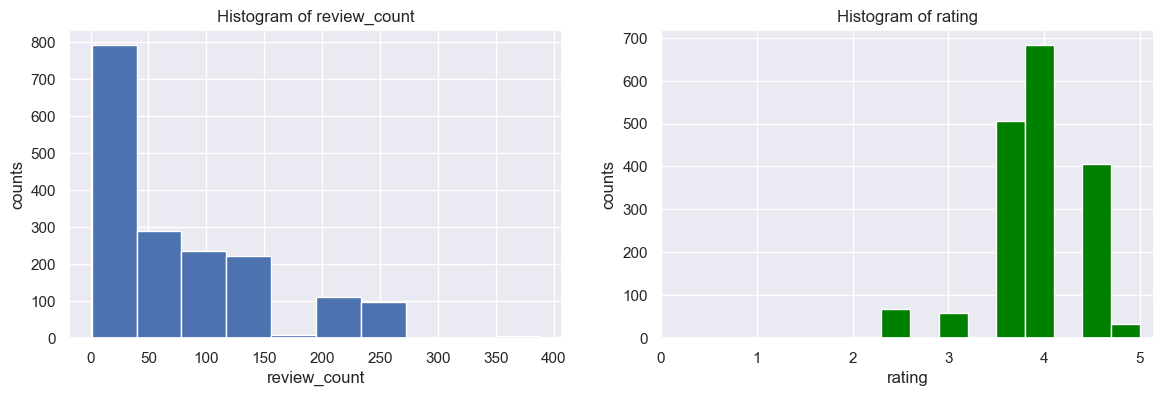

In [21]:
# Create 2 graphs to visualize the distribution of  'review_count' and 'rating':
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot 0
axes[0].hist(merged_all_df['review_count'])
axes[0].set_title('Histogram of review_count')
axes[0].set_xlabel('review_count')
axes[0].set_ylabel('counts')

# Plot 1
axes[1].hist(merged_all_df['rating'], color='green')
axes[1].set_title('Histogram of rating')
axes[1].set_xlabel('rating')
axes[1].set_ylabel('counts')
axes[1].set_xlim(left=0)

plt.show()

In [22]:
# As the distributions of these two columns are skewed, we will fill in the missing values with the median.
merged_all_df['review_count'].fillna(merged_all_df['review_count'].median(), inplace=True)
merged_all_df['rating'].fillna(merged_all_df['rating'].median(), inplace=True)

* Treat missing values in 'price':

In [23]:
merged_all_df['price'].value_counts()

$$     1243
$$$     179
$       103
Name: price, dtype: int64

In [24]:
# Calculate the percentage of each price category
(merged_all_df['price'].value_counts() / merged_all_df['price'].notnull().sum()) * 100

$$     81.508197
$$$    11.737705
$       6.754098
Name: price, dtype: float64

In [25]:
# The '$$' value is most populated with > 80%, we'll use it to fill in missing values in this column
merged_all_df['price'].fillna('$$', inplace=True)

According to this paper at: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0252157#:~:text=Yelp%20use%20dollar%20signs%20(%24),higher%20level%20means%20more%20expensive

"Yelp uses dollar signs to categorize approximate cost per person for a meal in a restaurant. In particular, one dollar sign means under 10 dollars; two dollar signs means from 11 to 30 dollars; three dollar signa means from 31 to 60 dollars; and four dollar signs means above 61 dollars.

We can reassign the funky dollar sign values in 'price' column into a categorical system that takes 1 to 4 as price levels. Higher level means more expensive.

In [26]:
def assign_price_level(price):
    if price == '$':
        return 1
    elif price == '$$':
        return 2
    elif price == '$$$':
        return 3
    else:
        return 4
    
merged_all_df['price_level'] = merged_all_df['price'].apply(assign_price_level)

In [27]:
# Drop 'price' as we already indicated the same thing in 'price_level'
merged_all_df = merged_all_df.drop('price', axis=1)

In [28]:
merged_all_df

,cb_station_id,cb_station_name,cb_latitude,cb_longitude,cb_bike_num,name,postcode,category,distance,review_count,rating,cb_name_count,price_level
0,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Resto-bar Capucine - Nord-Est de Montréal,Unavailable,Sports Bar,246.0,44.0,4.0,4,2
1,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Piano Bar la Belle Epoque,H1G 2V6,Cocktail Bar,661.0,44.0,4.0,4,2
2,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,Cafe liana bar & grill,H1E 1M4,Bar,809.0,44.0,4.0,4,2
3,72bfd647b3d2b650546f42319729757d,Cégep Marie-Victorin,45.617500,-73.606011,11,La Veranda,H1G 2V5,Bar,960.0,44.0,4.0,4,2
4,36c6491aa1b52e5ef7005f984738de27,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,15,Le Saint Bock,H2X 3K4,Bar,132.0,44.0,4.0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,6d0a3c1b3a79bb42f1125970e00cd5b1,Parc du Pélican (1ere Ave / Masson),45.545188,-73.576443,39,La Succursale,H1Y 1Y1,Lounge,607.0,25.0,4.0,10,2
5903,6d0a3c1b3a79bb42f1125970e00cd5b1,Parc du Pélican (1ere Ave / Masson),45.545188,-73.576443,39,Pub Rosemont,H2G 1V2,Lounge,797.0,44.0,4.0,10,2
5904,6d0a3c1b3a79bb42f1125970e00cd5b1,Parc du Pélican (1ere Ave / Masson),45.545188,-73.576443,39,Chez Baptiste Sur Masson,H1Y 1X6,Bar,433.0,44.0,4.0,10,2
5905,6d0a3c1b3a79bb42f1125970e00cd5b1,Parc du Pélican (1ere Ave / Masson),45.545188,-73.576443,39,Broue Bar Gaspé,H1Y 1W1,Karaoke Bar,25.0,44.0,4.0,10,2


In [29]:
# Final check for missing values
merged_all_df.isnull().sum()

cb_station_id      0
cb_station_name    0
cb_latitude        0
cb_longitude       0
cb_bike_num        0
name               0
postcode           0
category           0
distance           0
review_count       0
rating             0
cb_name_count      0
price_level        0
dtype: int64

In [30]:
merged_all_df.shape

(5907, 13)

In [31]:
# Drop duplicates (if any) after treating n/a, but there aren't any because cb_station_id is unique
merged_all_df.drop_duplicates(inplace=True)

### Visualizing the data

In [32]:
merged_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5907 entries, 0 to 5906
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cb_station_id    5907 non-null   object 
 1   cb_station_name  5907 non-null   object 
 2   cb_latitude      5907 non-null   float64
 3   cb_longitude     5907 non-null   float64
 4   cb_bike_num      5907 non-null   int64  
 5   name             5907 non-null   object 
 6   postcode         5907 non-null   object 
 7   category         5907 non-null   object 
 8   distance         5907 non-null   float64
 9   review_count     5907 non-null   float64
 10  rating           5907 non-null   float64
 11  cb_name_count    5907 non-null   int64  
 12  price_level      5907 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 646.1+ KB


* Exploring numeric columns:

In [33]:
numeric_cols = merged_all_df.select_dtypes(include=['number']).columns
numeric_cols

Index(['cb_latitude', 'cb_longitude', 'cb_bike_num', 'distance',
       'review_count', 'rating', 'cb_name_count', 'price_level'],
      dtype='object')

In [34]:
numeric_merge_df = merged_all_df[numeric_cols]
numeric_merge_df

,cb_latitude,cb_longitude,cb_bike_num,distance,review_count,rating,cb_name_count,price_level
0,45.617500,-73.606011,11,246.0,44.0,4.0,4,2
1,45.617500,-73.606011,11,661.0,44.0,4.0,4,2
2,45.617500,-73.606011,11,809.0,44.0,4.0,4,2
3,45.617500,-73.606011,11,960.0,44.0,4.0,4,2
4,45.516926,-73.564257,15,132.0,44.0,4.0,10,2
...,...,...,...,...,...,...,...,...
5902,45.545188,-73.576443,39,607.0,25.0,4.0,10,2
5903,45.545188,-73.576443,39,797.0,44.0,4.0,10,2
5904,45.545188,-73.576443,39,433.0,44.0,4.0,10,2
5905,45.545188,-73.576443,39,25.0,44.0,4.0,10,2


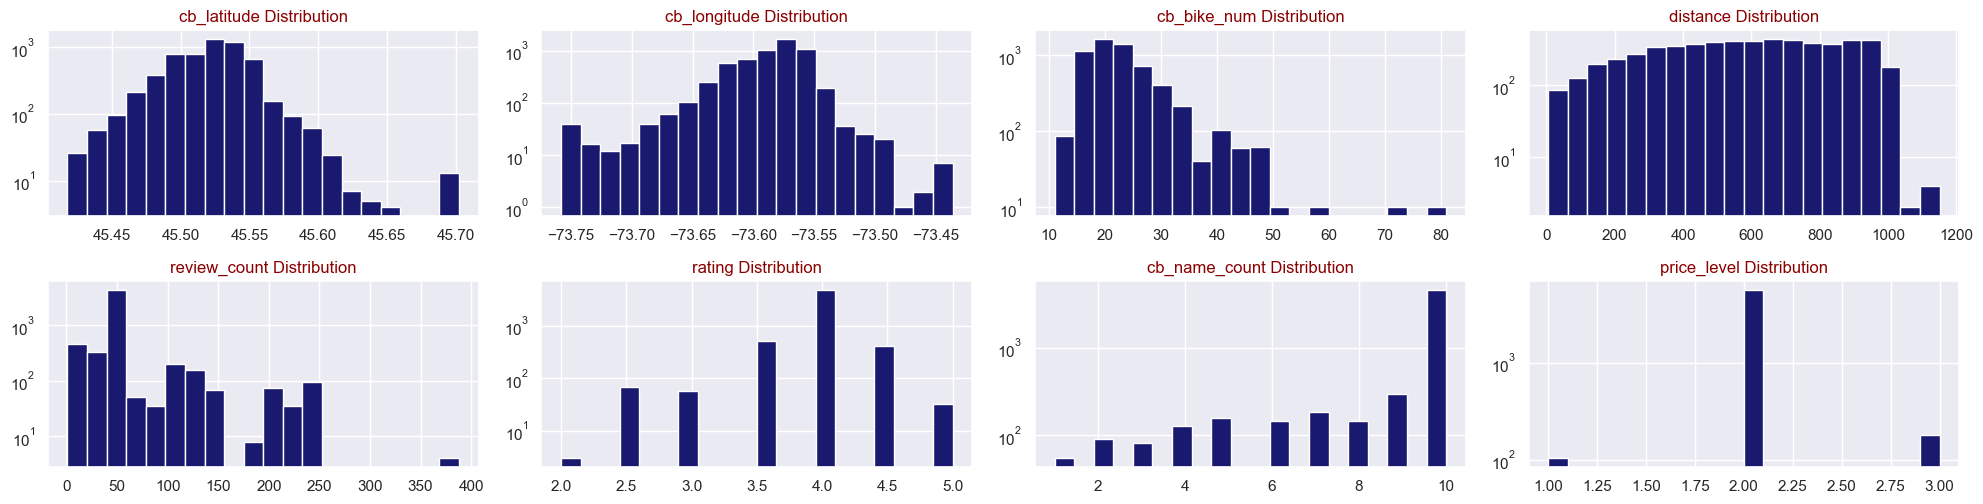

In [35]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor='Midnightblue')
        ax.set_title(feature + " Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
    
draw_histograms(numeric_merge_df,numeric_merge_df.columns,8,4)

There are still bar locations that are further out than 1Km from Montreal bike stations. The distribution of 'cb_bike_num' is skewed with outliers.

As per characteristic of bars (of numeric type except for 'price_level'): 'distance' looks somewhat like a uniform distribution. The distribution of 'review_count' looks skewed, 'rating' has a pretty good shape of normal distribution without outliers. 

We are dealing with outliers, and we can also test the normal distribution of some of those numeric columns.

In [36]:
# Enforce the condition 'distance'values must be <= 1000 from the bike stations
merged_all_df = merged_all_df[merged_all_df['distance'] <= 1000]

* Treating outliers: We won't take into accounts outliers in 'cb_latitude' and 'cb_longitude' since we want to include all bike stations in Montreal.

In [37]:
# Percentage of rows with outliers where 'cb_bike_num' >50
len(merged_all_df[merged_all_df['cb_bike_num'] <= 50])/len(merged_all_df)

0.9931752260706365

In [38]:
# Percentage of rows with outliers where 'review_count' >300
len(merged_all_df[merged_all_df['review_count'] <= 300])/len(merged_all_df)

0.9993175226070636

We'll lose around 1% of our data (~60 rows) for each outlier removal which is quite ok.

In [39]:
# Remove extreme outliers where 'cb_bike_num' >50
merged_all_df = merged_all_df[merged_all_df['cb_bike_num'] <= 50]

In [40]:
# Remove extreme outliers where 'review_count' >300
merged_all_df = merged_all_df[merged_all_df['review_count'] <= 300]

In [41]:
merged_all_df.shape

(5819, 13)

In [42]:
merged_all_df_clean = merged_all_df.copy()

# Save the clean merged_all_df after EDA results to csv for part 4
merged_all_df_clean.to_csv('../data/merged_all_df_clean.csv', index=False)

* Perform Shapiro-Wilk's normality test on 'cb_bike_num', 'cb_name_count', 'distance', 'review_count', 'rating':
- H<sub>0</sub>: data is normally distributed
- H<sub>a</sub>: data is not normally distributed


In [43]:
stat, p = stats.shapiro(merged_all_df['cb_bike_num'])
print(p)

0.0


In [44]:
stat, p = stats.shapiro(merged_all_df['cb_name_count'])
print(p)

0.0


In [45]:
stat, p = stats.shapiro(merged_all_df['distance'])
print(p)

3.981596353374347e-34


In [46]:
stat, p = stats.shapiro(merged_all_df['review_count'])
print(p)

0.0


In [47]:
stat, p = stats.shapiro(merged_all_df['rating'])
print(p)

0.0


Since p<<0.05, we reject the null hypothesis that the data in these columns are normally distributed.

* Exploring categorical columns:

Which station has the most bars close by?

In [48]:
merged_all_df['cb_station_id'].nunique()

746

In [49]:
merged_all_df['cb_station_name'].nunique()

746

In [50]:
stations_barnum_sorted = merged_all_df.groupby(['cb_station_id', 'cb_station_name'])['cb_name_count'].mean().sort_values(ascending=False).reset_index()
stations_barnum_sorted

,cb_station_id,cb_station_name,cb_name_count
0,00c210cb99cf9d1b923c1548938aee56,Marché Jean-Talon (Casgrain / Shamrock),10.0
1,636183b074c59d10b7ef068230b11fb9,Marie-Anne / St-Hubert,10.0
2,62f1efb1b3ff5fb90b87bbe17174fdde,8e avenue / Everett,10.0
3,c73445e90f1a3324b77d2c1fdb4d53e3,Durocher / Sherbrooke,10.0
4,6251ff1e68672d14ccd94dd4d5d86680,St-André / Ontario,10.0
...,...,...,...
741,b77888871c6837a551022c5c739042ac,Parc Kirkland (des Érables / Boyer),1.0
742,efe7c56e36749af8000e9ef4ee4fc883,Gare Montpellier (Muir / de la Côte-Vertu),1.0
743,8661cea9ae725868605cd27fbe516bf7,Hôpital Maisonneuve-Rosemont (Rosemont / Chate...,1.0
744,a65aa68cb23206fc1b15868873e36df2,90e Avenue / Boulevard Lévesque O,1.0


In [51]:
# The majority of numbar of bars associated per station is 10 bars on average
stations_barnum_sorted['cb_name_count'].describe()

count    746.000000
mean       7.836461
std        3.204872
min        1.000000
25%        5.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: cb_name_count, dtype: float64

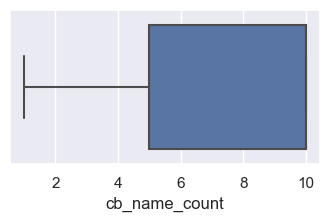

In [52]:
fig=plt.figure(figsize=(4,2))
sns.boxplot(x=stations_barnum_sorted['cb_name_count'])
plt.show()

In [53]:
# The top stations with the most number of bars will be mostly those with 10 bars nearby
top_barnum_stations = stations_barnum_sorted[stations_barnum_sorted['cb_name_count']==10]
top_barnum_stations

,cb_station_id,cb_station_name,cb_name_count
0,00c210cb99cf9d1b923c1548938aee56,Marché Jean-Talon (Casgrain / Shamrock),10.0
1,636183b074c59d10b7ef068230b11fb9,Marie-Anne / St-Hubert,10.0
2,62f1efb1b3ff5fb90b87bbe17174fdde,8e avenue / Everett,10.0
3,c73445e90f1a3324b77d2c1fdb4d53e3,Durocher / Sherbrooke,10.0
4,6251ff1e68672d14ccd94dd4d5d86680,St-André / Ontario,10.0
...,...,...,...
454,301ddcb76b9061b666c8b0f473a4f74e,Louis-Hébert / Bélanger,10.0
455,3126d658666f5f32075689284fc0ae02,5e avenue / Masson,10.0
456,32062cce0f8aa927527eeca915fd3afd,Parc Joseph-Robin (18e avenue / Everett),10.0
457,30b3972ded9afdaa750cbbeef330fe74,Marché Jean-Talon (Henri-Julien / Jean-Talon),10.0


Is there any relationship between the bike station name and the bar postcode and categories?

In [54]:
stations_postcode = merged_all_df[['cb_station_name','postcode']].drop_duplicates()
stations_postcode

,cb_station_name,postcode
0,Cégep Marie-Victorin,Unavailable
1,Cégep Marie-Victorin,H1G 2V6
2,Cégep Marie-Victorin,H1E 1M4
3,Cégep Marie-Victorin,H1G 2V5
4,Gare d'autocars de Montréal (Berri / Ontario),H2X 3K4
...,...,...
5902,Parc du Pélican (1ere Ave / Masson),H1Y 1Y1
5903,Parc du Pélican (1ere Ave / Masson),H2G 1V2
5904,Parc du Pélican (1ere Ave / Masson),H1Y 1X6
5905,Parc du Pélican (1ere Ave / Masson),H1Y 1W1


In [55]:
stations_postcode['postcode_prefix'] = stations_postcode['postcode'].str[:3]
stations_postcode = stations_postcode[stations_postcode['postcode_prefix'] != 'Una'].drop('postcode', axis=1).drop_duplicates()
stations_postcode

,cb_station_name,postcode_prefix
1,Cégep Marie-Victorin,H1G
2,Cégep Marie-Victorin,H1E
4,Gare d'autocars de Montréal (Berri / Ontario),H2X
12,Gare d'autocars de Montréal (Berri / Ontario),H2L
15,Centre des loisirs (Tassé / Grenet),H4L
...,...,...
5890,de la Montagne / Notre-Dame,H3B
5891,de la Montagne / Notre-Dame,H3G
5897,Parc du Pélican (1ere Ave / Masson),H1Y
5899,Parc du Pélican (1ere Ave / Masson),H2G


It's unclear if there's any relationship between the bike station name and the bar postcode and categories at this point, because of the large number of unique combinations. Visualization won't be the best option to carry out EDA for our categorical columns overall. To keep things simpler, it's better to just use numerical columns for prediction in our model in part 4, and not going forward with encoding categorical data.

Recall in the previous section of data visualization, all of our numeric columns have p value = 0 or very small in the normality test. However, we won't apply data transformation to convert those numeric columns into normal distribution within our scope.

* Correlation matrix:

In [56]:
merged_all_df.corr()

,cb_latitude,cb_longitude,cb_bike_num,distance,review_count,rating,cb_name_count,price_level
cb_latitude,1.000000,-0.025354,-0.173026,0.071211,-0.154979,-0.038108,-0.125023,-0.082012
cb_longitude,-0.025354,1.000000,0.187417,-0.082700,0.126012,-0.025090,0.250283,0.050828
cb_bike_num,-0.173026,0.187417,1.000000,-0.105264,0.177271,-0.019131,0.154736,0.064774
distance,0.071211,-0.082700,-0.105264,1.000000,-0.054714,0.029262,-0.112028,0.004864
review_count,-0.154979,0.126012,0.177271,-0.054714,1.000000,0.252307,0.087482,0.267612
rating,-0.038108,-0.025090,-0.019131,0.029262,0.252307,1.000000,0.005056,0.120319
cb_name_count,-0.125023,0.250283,0.154736,-0.112028,0.087482,0.005056,1.000000,0.032525
price_level,-0.082012,0.050828,0.064774,0.004864,0.267612,0.120319,0.032525,1.000000


<Axes: >

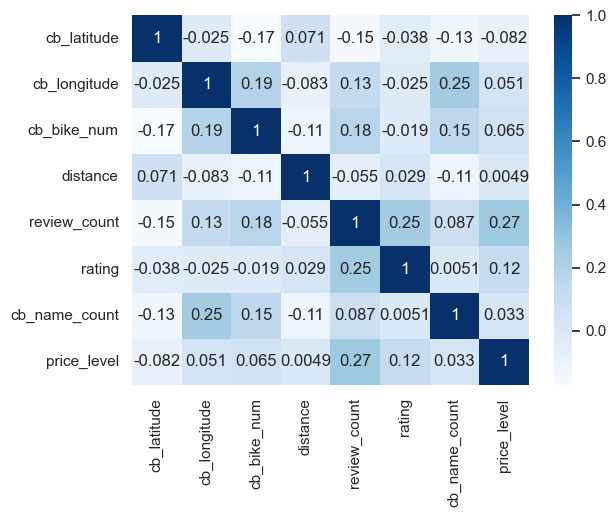

In [57]:
sns.heatmap(merged_all_df.corr(), annot = True, cmap="Blues")

From this plot we can see that it seems like there may be a very small linear correlation between our target variable ('cb_bike_num') and these bar characteristics:

* Minor positive correlation with 'review_count' (0.18), 'price level' (0.065)
* Minor negative correlation with 'distance'(-0.11), 'rating' (-0.019)

A correlation near zero indicates the variables are not linearly related. Thus, we can exclude the variables with near zero correlation. Thus, the dependent variables kept in our model to predict our our target variable ('cb_bike_num') are 'review_count', 'distance'.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Our scope for this SQLite3 database in Python for part 3:

* Create connection and access data from three API results (dataframes) that we have from part 2 into 3 tables
* Use SQL queries to access data from those 3 tables
* Join data from three multiple tables

In [58]:
# Import libraries and modules
import sqlite3
from sqlite3 import Error

* Create connection and access data from three API results (dataframes) that we have from part 2 into 3 tables

In [59]:

def create_connection(path):
    """ Create a database connection to a SQLite database """
    connection = None
    try:
        connection = sqlite3.connect(path)
        print('Connection to SQLite DB successful')
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [60]:
# Create an empty database named 'merged_all_sql.db' in '../data/' if not exists
connection = create_connection('../data/merged_all_sql.db')

Connection to SQLite DB successful


In [61]:
# Create a new set of dataframes again for citybikes foursquare and yelp data
cb_sql_df = pd.read_csv('../data/cb_montreal_stations.csv')
fsq_sql_df = pd.read_csv('../data/fsq_bar_features.csv')
yelp_sql_df = pd.read_csv('../data/yelp_bar_features.csv')

In [62]:
# Write DataFrame to SQLite tables: 'citybikes', 'foursquare', 'yelp' without index
cb_sql_df.to_sql('citybikes', connection, if_exists='replace', index='False')
fsq_sql_df.to_sql('foursquare', connection, if_exists='replace', index='False')
yelp_sql_df.to_sql('yelp', connection, if_exists='replace', index='False')

9081

* Use SQL queries to access data from those 3 tables

Look at the data before and after the join to validate your data.

In [63]:
# Create a function execute_read_query()
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [64]:
# Query data from the 'citybikes' table
select_citybikes = "SELECT * from citybikes"
cb_rows = execute_read_query(connection, select_citybikes)

# Print one sample
for cb_row in cb_rows:
    print(cb_row)
    break

(0, '72bfd647b3d2b650546f42319729757d', 'Cégep Marie-Victorin', 45.61749978312808, -73.60601127147675, 11)


In [65]:
# Query data from the 'foursquare' table
select_foursquare = "SELECT * from foursquare"
fsq_rows = execute_read_query(connection, select_foursquare)

# Print one sample
for fsq_row in fsq_rows:
    print(fsq_row)
    break

(0, 'Resto-bar Capucine - Nord-Est de Montréal', None, 'Sports Bar', 246.0, 45.61749978312808, -73.60601127147675)


In [66]:
# Query data from the 'yelp' table
select_yelp = "SELECT * from yelp"
yelp_rows = execute_read_query(connection, select_yelp)

# Print one sample
for yelp_row in yelp_rows:
    print(yelp_row)
    break

(0, 'Le 4e Mur', 'H2X 3K8', 'Bars', 99.0, 4.5, '$$', 145.03062584949998, 45.516926210319546, -73.56425732374191)


* Join data from three multiple tables into a database

In [67]:
# Apply the same concept as in the pandas joining tables
# Add 'review_count', 'rating', 'price' columns from the 'yelp' to 'fsq' dataframe

left_join_foursquare_yelp = '''
CREATE VIEW left_join_foursquare_yelp
AS 
SELECT foursquare.*
FROM foursquare
LEFT JOIN (
    SELECT DISTINCT name, review_count, rating, price
    FROM yelp
) As tbl ON foursquare.name = tbl.name;
'''

fsq_yelp_rows = execute_read_query(connection, left_join_foursquare_yelp)

In [68]:
# Create a view that combines the 'left_join_foursquare_yelp' view and 'citybikes' table

foursquare_yelp_citybikes = '''
CREATE VIEW merge_foursquare_yelp_citybikes
AS 
SELECT *
FROM left_join_foursquare_yelp
INNER JOIN citybikes AS cb
ON cb.cb_latitude = left_join_foursquare_yelp.latitude
AND cb.cb_longitude = left_join_foursquare_yelp.longitude;
'''

foursquare_yelp_citybikes = execute_read_query(connection, foursquare_yelp_citybikes)

The joined database is saved now as a view named 'foursquare_yelp_citybikes' in the 'merged_all_sql.db' database.